# Introduction

Storms and other severe weather events can cause both public health and economic problems for communities and municipalities. Many severe events can result in fatalities, injuries, and property damage, and preventing such outcomes to the extent possible is a key concern.

This project involves exploring the U.S. National Oceanic and Atmospheric Administration’s (NOAA) storm database. This database tracks characteristics of major storms and weather events in the United States, including when and where they occur, as well as estimates of any fatalities, injuries, and property damage.

The data for this project come in the form of a comma-separated-value file compressed via the bzip2 algorithm to reduce its size. You can download the file from the course web site:

[Storm Data](https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2) [47Mb]

There is also some documentation of the database available. Here you will find how some of the variables are constructed/defined.

National Weather Service [Storm Data Documentation](https://d396qusza40orc.cloudfront.net/repdata%2Fpeer2_doc%2Fpd01016005curr.pdf)

National Climatic Data Center Storm Events [FAQ](https://d396qusza40orc.cloudfront.net/repdata%2Fpeer2_doc%2FNCDC%20Storm%20Events-FAQ%20Page.pdf)

The events in the database start in the year 1950 and end in November 2011. In the earlier years of the database there are generally fewer events recorded, most likely due to a lack of good records. More recent years should be considered more complete.

# Loading And Preprocessing The Data

### Importing The Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.api as sms
import seaborn as sb
import statsmodels.api as sm
from matplotlib import rcParams
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

### Import The Dataset

In [140]:
StormData =  pd.read_csv('StormData.csv.bz2', encoding = "ISO-8859-1")
StormData.head()

C:\Users\Mehdi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,...,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0


In [141]:
StormData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902297 entries, 0 to 902296
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STATE__     902297 non-null  float64
 1   BGN_DATE    902297 non-null  object 
 2   BGN_TIME    902297 non-null  object 
 3   TIME_ZONE   902297 non-null  object 
 4   COUNTY      902297 non-null  float64
 5   COUNTYNAME  900708 non-null  object 
 6   STATE       902297 non-null  object 
 7   EVTYPE      902297 non-null  object 
 8   BGN_RANGE   902297 non-null  float64
 9   BGN_AZI     354965 non-null  object 
 10  BGN_LOCATI  614554 non-null  object 
 11  END_DATE    658886 non-null  object 
 12  END_TIME    663319 non-null  object 
 13  COUNTY_END  902297 non-null  float64
 14  COUNTYENDN  0 non-null       float64
 15  END_RANGE   902297 non-null  float64
 16  END_AZI     177460 non-null  object 
 17  END_LOCATI  403072 non-null  object 
 18  LENGTH      902297 non-null  float64
 19  WI

In [142]:
StormData['FATALITIES'].describe()

count    902297.000000
mean          0.016785
std           0.765283
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         583.000000
Name: FATALITIES, dtype: float64

In [143]:
StormData['INJURIES'].describe()

count    902297.000000
mean          0.155745
std           5.431887
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1700.000000
Name: INJURIES, dtype: float64

### Preprocessing the data

#### Create Year Variable

In [144]:
StormData['Year'] = pd.to_datetime(StormData['BGN_DATE']).apply(lambda x: x.strftime('%Y')) 
StormData['Year']

0         1950
1         1950
2         1951
3         1951
4         1951
          ... 
902292    2011
902293    2011
902294    2011
902295    2011
902296    2011
Name: Year, Length: 902297, dtype: object

#### Histogram of Total Number Of Storms

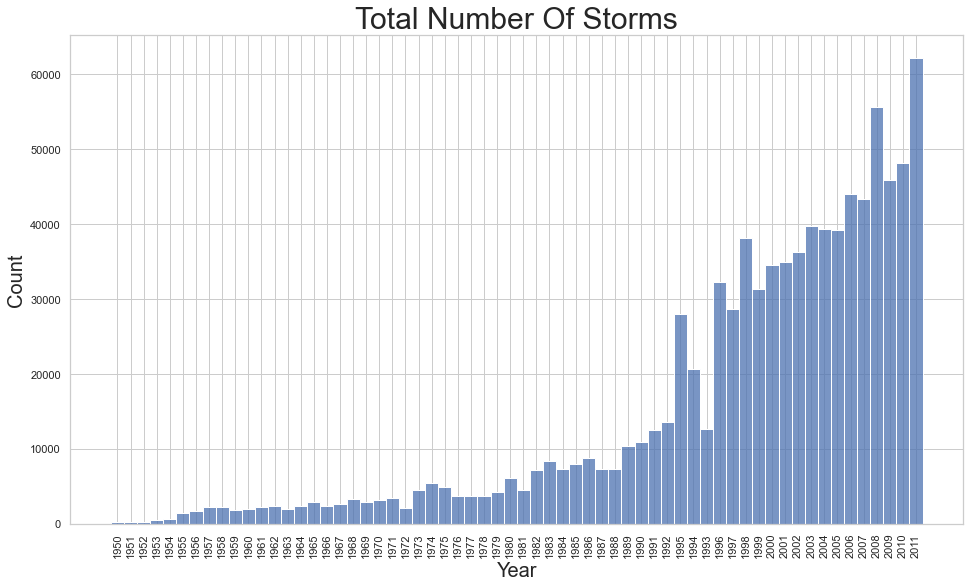

In [145]:
plt.rcParams["figure.figsize"] = [16,9]

sb.histplot(data=StormData, x= "Year", palette = 'Blues', bins=30)
plt.title("Total Number Of Storms", fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=90)

plt.show()

Based on the above histogram, we observe that the number of events recorded in this dataset, between 1950 and 1990 is low comparing to the number of events registered from 1990 to 2011.

# Fatalities and Injuries

### Calculating the total fatalities and total injuries by year

In [146]:
Casualties_y = StormData.groupby(['Year'])
Casualties_y = Casualties_y['FATALITIES', 'INJURIES'].agg([np.sum])
Casualties_y = Casualties_y.reset_index()
Casualties_y.columns = list(map(''.join, Casualties_y.columns.values))
Casualties_y = Casualties_y.rename(columns={'FATALITIESsum': 'FATALITIES', 'INJURIESsum' : 'INJURIES'})
Casualties_y.head()

<ipython-input-146-b30306a3aacb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Casualties_y = Casualties_y['FATALITIES', 'INJURIES'].agg([np.sum])


,Year,FATALITIES,INJURIES
0,1950,70.0,659.0
1,1951,34.0,524.0
2,1952,230.0,1915.0
3,1953,519.0,5131.0
4,1954,36.0,715.0


### Calculating the total fatalities and injuries by event type

In [147]:
Casualties_t = StormData.groupby(['EVTYPE'])
Casualties_t = Casualties_t['FATALITIES', 'INJURIES'].agg([np.sum])
Casualties_t = Casualties_t.reset_index()
Casualties_t.columns = list(map(''.join, Casualties_t.columns.values))
Casualties_t = Casualties_t.rename(columns={'FATALITIESsum': 'FATALITIES', 'INJURIESsum' : 'INJURIES'})
Casualties_t.head()

<ipython-input-147-1e6bc79121bd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Casualties_t = Casualties_t['FATALITIES', 'INJURIES'].agg([np.sum])


,EVTYPE,FATALITIES,INJURIES
0,HIGH SURF ADVISORY,0.0,0.0
1,COASTAL FLOOD,0.0,0.0
2,FLASH FLOOD,0.0,0.0
3,LIGHTNING,0.0,0.0
4,TSTM WIND,0.0,0.0


# Property and Crop Damage

### Creating Property and Crop Damage Variable

In [148]:
def convertCara(e) :
    if e == "h" or e == "H" :
        return(2)
    elif e == "k"or e == "K" :
        return(3)
    elif e == "m"or e == "M" :
        return(6)
    elif e == "b"or e == "B" :
        return(9)
    else :
        return(0)
    
UnitsP = StormData['PROPDMGEXP'].apply(lambda x: convertCara(x))  
UnitsC = StormData['CROPDMGEXP'].apply(lambda x: convertCara(x))

StormData['PROPDMG'] = StormData['PROPDMG'] * (10 ** UnitsP)
StormData['CROPDMG'] = StormData['CROPDMG'] * (10 ** UnitsC)


StormData[['PROPDMG', 'CROPDMG']].head()

,PROPDMG,CROPDMG
0,25000.0,0.0
1,2500.0,0.0
2,25000.0,0.0
3,2500.0,0.0
4,2500.0,0.0


### Calculating the total property and total crop damage by year

In [149]:
dammage_y = StormData.groupby(['Year'])
dammage_y = dammage_y['PROPDMG', 'CROPDMG'].agg([np.sum])
dammage_y = dammage_y.reset_index()
dammage_y.columns = list(map(''.join, dammage_y.columns.values))
dammage_y = dammage_y.rename(columns={'PROPDMGsum': 'PROPDMG', 'CROPDMGsum' : 'CROPDMG'})
dammage_y.head()

<ipython-input-149-228868f9871f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dammage_y = dammage_y['PROPDMG', 'CROPDMG'].agg([np.sum])


,Year,PROPDMG,CROPDMG
0,1950,34481650.0,0.0
1,1951,65505990.0,0.0
2,1952,94102240.0,0.0
3,1953,596104700.0,0.0
4,1954,85805320.0,0.0


### Calculating the total property and total crop damage event type

In [150]:
dammage_t = StormData.groupby(['EVTYPE'])
dammage_t = dammage_t['PROPDMG', 'CROPDMG'].agg(['sum'])
dammage_t = dammage_t.reset_index()
dammage_t.columns = list(map(''.join, dammage_t.columns.values))
dammage_t = dammage_t.rename(columns={'PROPDMGsum': 'PROPDMG', 'CROPDMGsum' : 'CROPDMG'})
dammage_t.head()

<ipython-input-150-13af1783358a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dammage_t = dammage_t['PROPDMG', 'CROPDMG'].agg(['sum'])


,EVTYPE,PROPDMG,CROPDMG
0,HIGH SURF ADVISORY,200000.0,0.0
1,COASTAL FLOOD,0.0,0.0
2,FLASH FLOOD,50000.0,0.0
3,LIGHTNING,0.0,0.0
4,TSTM WIND,8100000.0,0.0


# Results

### Impact on Public Health

#### Evolution of the number of fatalities and injuries over the years

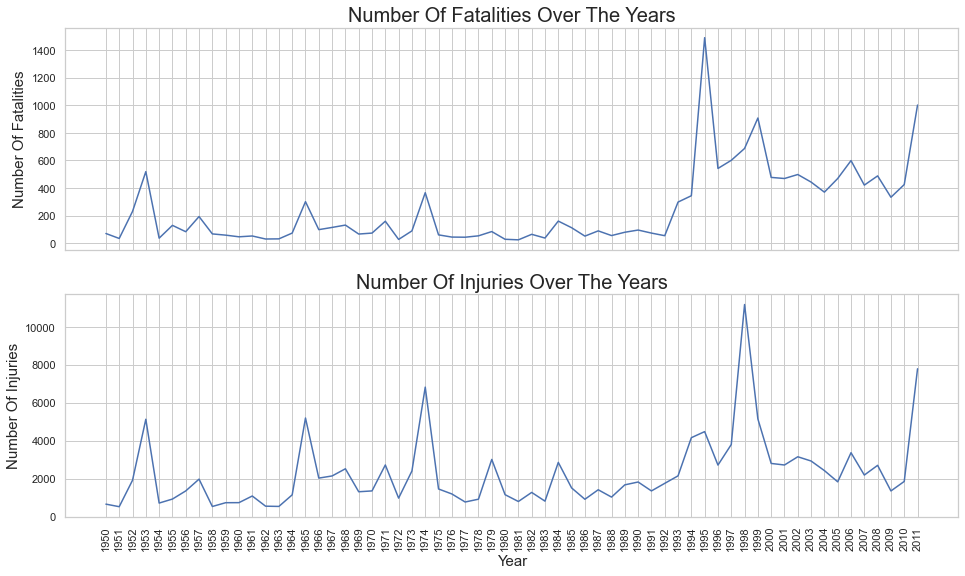

In [151]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(Casualties_y['Year'],Casualties_y['FATALITIES'])
ax2.plot(Casualties_y['Year'],Casualties_y['INJURIES'])
ax1.set_title('Number Of Fatalities Over The Years', fontsize = 20)
ax2.set_title('Number Of Injuries Over The Years', fontsize = 20)

for ax in fig.get_axes():
    ax.label_outer()
    
ax2.set_xlabel('Year', fontsize = 15)
    
ax1.set_ylabel('Number Of Fatalities', fontsize = 15)  
ax2.set_ylabel('Number Of Injuries', fontsize = 15)
    
plt.xticks(rotation=90)

plt.show()

It is noticeable that the years 1990 and 1998 are the years with the most damage, in terms of the number of dead and injured people.

#### Events that caused most death and injury

In [152]:
fatal_events = Casualties_t[['EVTYPE', 'FATALITIES']]
fatal_events = fatal_events.sort_values('FATALITIES', ascending=False)
fatal_events = fatal_events.iloc[:10, :]


injury_events = Casualties_t[['EVTYPE', 'INJURIES']]
injury_events = injury_events.sort_values('INJURIES', ascending=False)
injury_events = injury_events.iloc[:10, :]

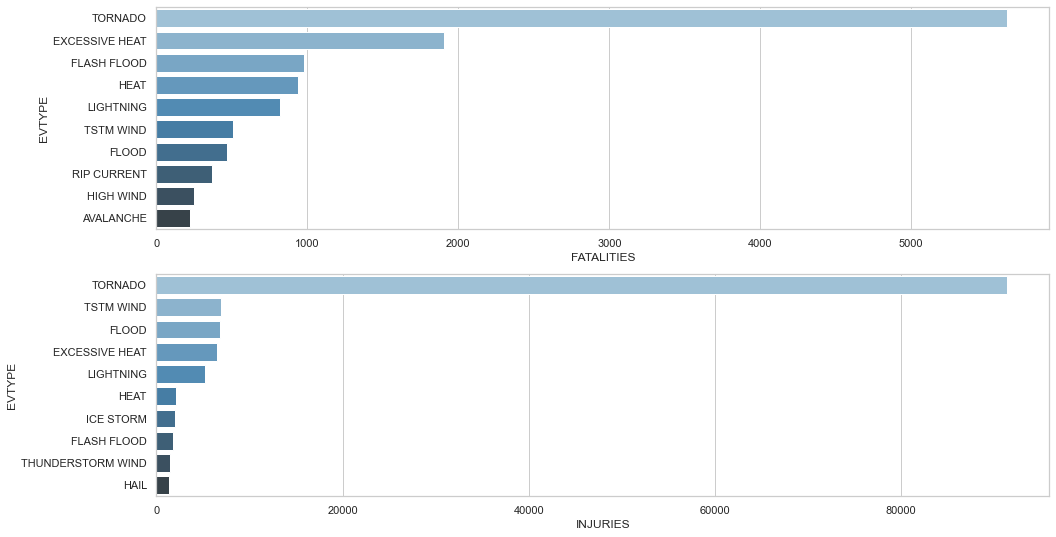

In [153]:
sb.set_theme(style="whitegrid")

fig, axs = plt.subplots(nrows =2)


sb.barplot(x="FATALITIES", y="EVTYPE", data=fatal_events,
            label="Total", palette = 'Blues_d', ax=axs[0])

sb.barplot(x="INJURIES", y="EVTYPE", data=injury_events,
            label="Total",palette = 'Blues_d', ax=axs[1])

plt.show()

We can observe in this figure that The Tornado is the most deadly weather events in the United State in the last 60 years.

### Impact on Economy

#### Evolution of the total property and crop damage over the years

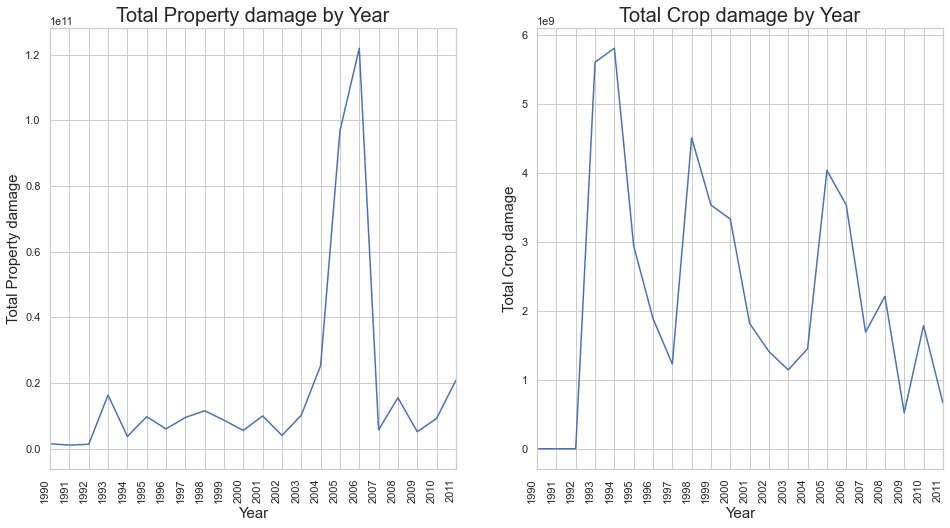

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(dammage_y['Year'],dammage_y['PROPDMG'])
ax2.plot(dammage_y['Year'],dammage_y['CROPDMG'])
ax1.set_title('Total Property damage by Year', fontsize = 20)
ax2.set_title('Total Crop damage by Year', fontsize = 20)

ax1.set_xlabel('Year', fontsize = 15)   
ax2.set_xlabel('Year', fontsize = 15)
    
ax1.set_ylabel('Total Property damage', fontsize = 15)  
ax2.set_ylabel('Total Crop damage', fontsize = 15)

ax1.set_xlim(['1990' , '2011'])
ax2.set_xlim(['1990' , '2011'])
    
    
fig.autofmt_xdate(rotation=90)

plt.show()

The record of Property and Crop damage started in 1990. So we gonna look for the event that caused the biggest property and crop damage between 1990 and 2011.

#### Events that has the greatest economic consequences

In [162]:
prop_damage = dammage_t[['EVTYPE', 'PROPDMG']]
prop_damage = prop_damage.sort_values('PROPDMG', ascending=False)
prop_damage  = prop_damage.iloc[:10, :]


crop_damage = dammage_t[['EVTYPE', 'CROPDMG']]
crop_damage = crop_damage.sort_values('CROPDMG', ascending=False)
crop_damage = crop_damage.iloc[:10, :]

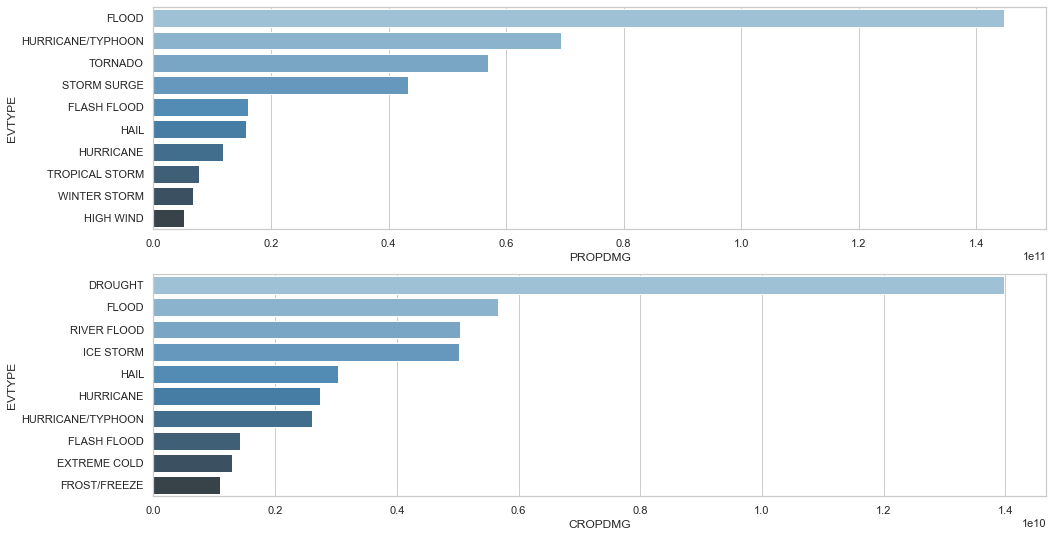

In [163]:
sb.set_theme(style="whitegrid")

fig, axs = plt.subplots(nrows =2)


sb.barplot(x="PROPDMG", y="EVTYPE", data=prop_damage,
            label="Total", palette = 'Blues_d', ax=axs[0])

sb.barplot(x="CROPDMG", y="EVTYPE", data=crop_damage,
            label="Total",palette = 'Blues_d', ax=axs[1])

plt.show()

We can see that FLOOD caused the biggest property damage in the last 20 years. Also, DROUGHT caused the greatest economic consequences in the case of Crop Damage.